In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random

import warnings
warnings.filterwarnings("ignore")

setpoint = ctrl.Antecedent(np.arange(18,27,0.1), 'SetPoint')
Value_sensor = ctrl.Antecedent(np.arange(0,100,1),'Sensor')
Pwm = ctrl.Consequent(np.arange(0,256,1),'Pwm')

In [16]:
setpoint['low'] = fuzz.trimf(setpoint.universe,(18,18,19))
setpoint['medium_low'] = fuzz.trimf(setpoint.universe,(18,19,20))
setpoint['medium'] = fuzz.trimf(setpoint.universe,(19,20,22))
setpoint['medium_high'] = fuzz.trimf(setpoint.universe,(20,22,24))
setpoint['high'] = fuzz.trimf(setpoint.universe,(22,27,27))
#setpoint.view()

Value_sensor['very low'] = fuzz.trimf(Value_sensor.universe,(0,0,5))
Value_sensor['low'] = fuzz.trimf(Value_sensor.universe,(0,5,10))
Value_sensor['normal'] = fuzz.trimf(Value_sensor.universe,(5,15,20))
Value_sensor['high'] = fuzz.trimf(Value_sensor.universe,(15,25,30))
Value_sensor['very high'] = fuzz.trimf(Value_sensor.universe,(25,40,40))
#Value_sensor.view()

Pwm['very slow'] = fuzz.trimf(Pwm.universe,(0,0,50))
Pwm['slow'] = fuzz.trimf(Pwm.universe,(0,50,100))
Pwm['normal'] = fuzz.trimf(Pwm.universe,(50,100,150))
Pwm['high'] = fuzz.trimf(Pwm.universe,(100,150,200))
Pwm['very high'] = fuzz.trimf(Pwm.universe,(150,200,255))
#Pwm.view()

In [17]:

rule1 = ctrl.Rule(setpoint['low']&Value_sensor['very low'],Pwm['very slow'])
rule2 = ctrl.Rule(setpoint['low']&Value_sensor['low'],Pwm['very slow'])
rule3 = ctrl.Rule(setpoint['low']&Value_sensor['normal'],Pwm['slow'])
rule4 = ctrl.Rule(setpoint['low']&Value_sensor['high'],Pwm['high'])
rule5 = ctrl.Rule(setpoint['low']&Value_sensor['very high'],Pwm['very high'])

rule6 = ctrl.Rule(setpoint['medium_low']&Value_sensor['very low'],Pwm['very slow'])
rule7 = ctrl.Rule(setpoint['medium_low']&Value_sensor['low'],Pwm['very slow'])
rule8 = ctrl.Rule(setpoint['medium_low']&Value_sensor['normal'],Pwm['slow'])
rule9 = ctrl.Rule(setpoint['medium_low']&Value_sensor['high'],Pwm['high'])
rule10 = ctrl.Rule(setpoint['medium_low']&Value_sensor['very high'],Pwm['very high'])

rule11 = ctrl.Rule(setpoint['medium']&Value_sensor['very low'],Pwm['slow'])
rule12 = ctrl.Rule(setpoint['medium']&Value_sensor['low'],Pwm['slow'])
rule13= ctrl.Rule(setpoint['medium']&Value_sensor['normal'],Pwm['normal'])
rule14 = ctrl.Rule(setpoint['medium']&Value_sensor['high'],Pwm['high'])
rule15 = ctrl.Rule(setpoint['medium']&Value_sensor['very high'],Pwm['very high'])

rule16 = ctrl.Rule(setpoint['medium_high']&Value_sensor['very low'],Pwm['slow'])
rule17 = ctrl.Rule(setpoint['medium_high']&Value_sensor['low'],Pwm['normal'])
rule18 = ctrl.Rule(setpoint['medium_high']&Value_sensor['normal'],Pwm['normal'])
rule19 = ctrl.Rule(setpoint['medium_high']&Value_sensor['high'],Pwm['normal'])
rule20 = ctrl.Rule(setpoint['medium_high']&Value_sensor['very high'],Pwm['high'])

rule21 = ctrl.Rule(setpoint['high']&Value_sensor['very low'],Pwm['normal'])
rule22 = ctrl.Rule(setpoint['high']&Value_sensor['low'],Pwm['normal'])
rule23 = ctrl.Rule(setpoint['high']&Value_sensor['normal'],Pwm['slow'])
rule24 = ctrl.Rule(setpoint['high']&Value_sensor['high'],Pwm['slow'])
rule25 = ctrl.Rule(setpoint['high']&Value_sensor['very high'],Pwm['slow'])

acting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, 
                                   rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
acting= ctrl.ControlSystemSimulation(acting_ctrl)

Your set point:30
The value of sensor is: 35 degree of Celcius
Needed Pwm is: 49.999999999999986


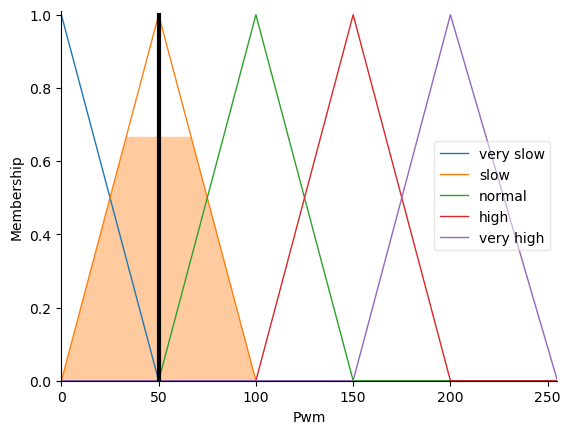

In [18]:
a = input('Your set point:')
b = random.randrange(0,41,1)
acting.input['SetPoint'] = float(a)
acting.input['Sensor'] = b
acting.compute()
print('The value of sensor is:',b,'degree of Celcius')
print('Needed Pwm is:', acting.output['Pwm'])
Pwm.view(sim=acting)

# Mobile Robot

In [21]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sensor_left = ctrl.Antecedent(np.arange(0, 101, 1), 'sensor_left')
sensor_right = ctrl.Antecedent(np.arange(0, 101, 1), 'sensor_right')
sensor_center = ctrl.Antecedent(np.arange(0, 101, 1), 'sensor_center')
pwm_L = ctrl.Consequent(np.arange(0, 101, 1), 'pwm_L')
pwm_R = ctrl.Consequent(np.arange(0, 101, 1), 'pwm_R')

sensor_left['near'] = fuzz.trimf(sensor_left.universe, [0, 0, 50])
sensor_left['far'] = fuzz.trimf(sensor_left.universe, [0, 50, 100])

sensor_right['near'] = fuzz.trimf(sensor_right.universe, [0, 0, 50])
sensor_right['far'] = fuzz.trimf(sensor_right.universe, [0, 50, 100])

sensor_center['near'] = fuzz.trimf(sensor_center.universe, [0, 0, 50])
sensor_center['far'] = fuzz.trimf(sensor_center.universe, [0, 50, 100])

pwm_L['forward'] = fuzz.trimf(pwm_L.universe, [0, 0, 50])
pwm_L['stop'] = fuzz.trimf(pwm_L.universe, [0, 50, 100])
pwm_L['backward'] = fuzz.trimf(pwm_L.universe, [50, 100, 100])

pwm_R['forward'] = fuzz.trimf(pwm_R.universe, [0, 0, 50])
pwm_R['stop'] = fuzz.trimf(pwm_R.universe, [0, 50, 100])
pwm_R['backward'] = fuzz.trimf(pwm_R.universe, [50, 100, 100])

rule1 = ctrl.Rule(sensor_center['far'], (pwm_L['forward'], pwm_R['forward']))
rule2 = ctrl.Rule(sensor_left['near'], (pwm_L['backward'], pwm_R['forward']))
rule3 = ctrl.Rule(sensor_right['near'], (pwm_L['forward'], pwm_R['backward']))
rule4 = ctrl.Rule(sensor_left['far'] & sensor_right['far'], (pwm_L['stop'], pwm_R['stop']))

pid_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

pid = ctrl.ControlSystemSimulation(pid_control)

pid.input['sensor_left'] = 60
pid.input['sensor_right'] = 40
pid.input['sensor_center'] = 80

pid.compute()

pwm_L_output = pid.output['pwm_L']
pwm_R_output = pid.output['pwm_R']

print('PWM-L output: ', pwm_L_output)
print('PWM-R output: ', pwm_R_output)

PWM-L output:  46.66666666666668
PWM-R output:  47.610062893081746
